# Постановка задачи

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import math
import scipy as sc

# Задание А

## Аналитическое решение

In [2]:
t = sp.symbols('t')
y = sp.Function('y')
equation = sp.Eq(y(t).diff(t,t)+y(t)-1,0)
sp.dsolve(equation)

Eq(y(t), C1*sin(t) + C2*cos(t) + 1)

In [3]:
sp.dsolve(equation, ics={y(0):0.5, y(sp.pi):1.5})

Eq(y(t), C1*sin(t) - 0.5*cos(t) + 1)

In [4]:
def u_(x):
    return (1 - 0.5*math.cos(x))

## Численное решение

In [5]:
x0 = 0
xn = math.pi
N_ = 5,10,25,100

N = 5 : Max error = 0.00487
N = 10 : Max error = 0.00116
N = 25 : Max error = 0.00018
N = 100 : Max error = 1e-05


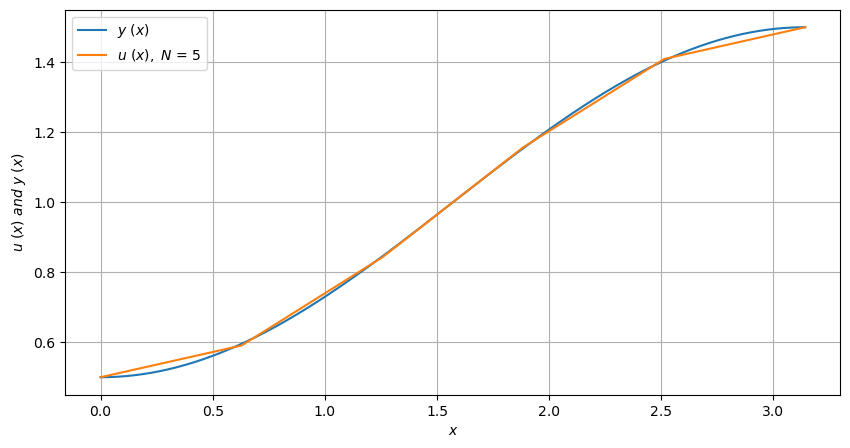

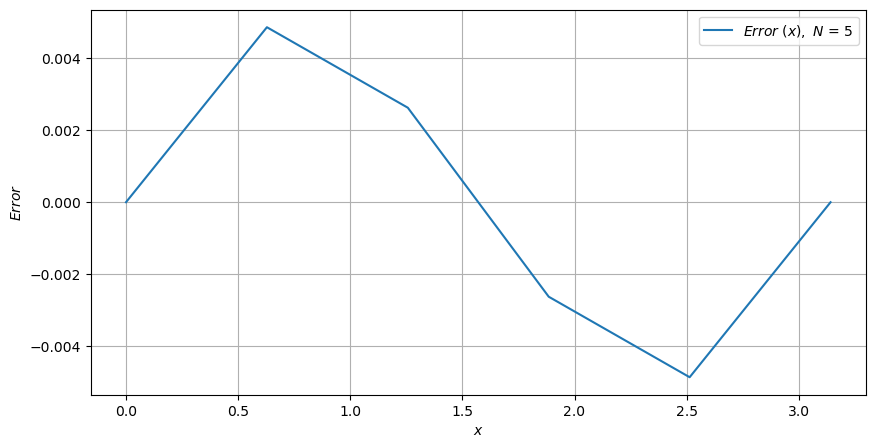

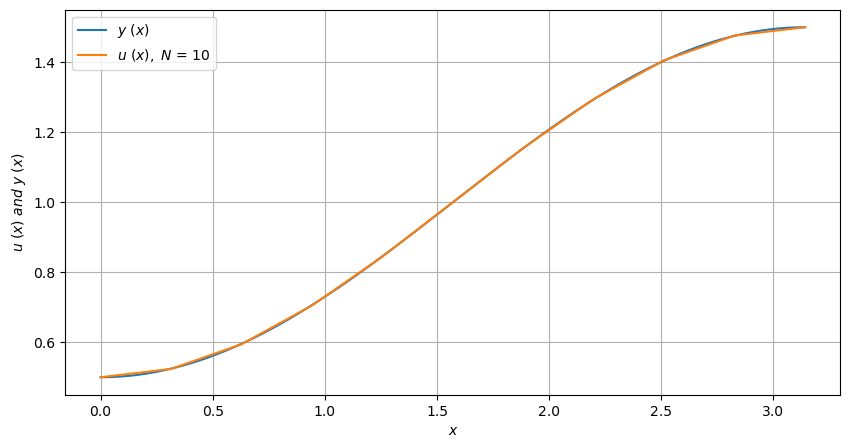

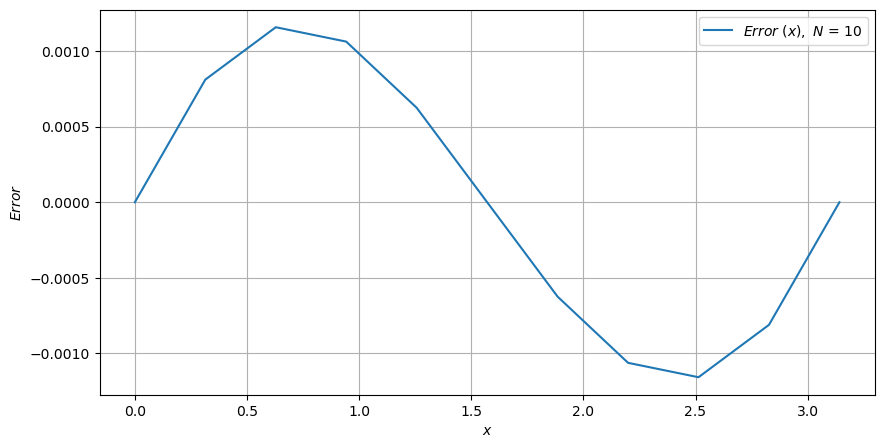

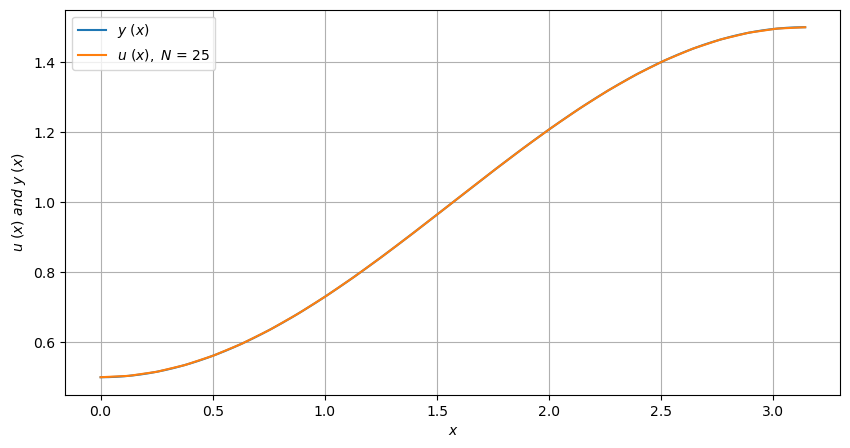

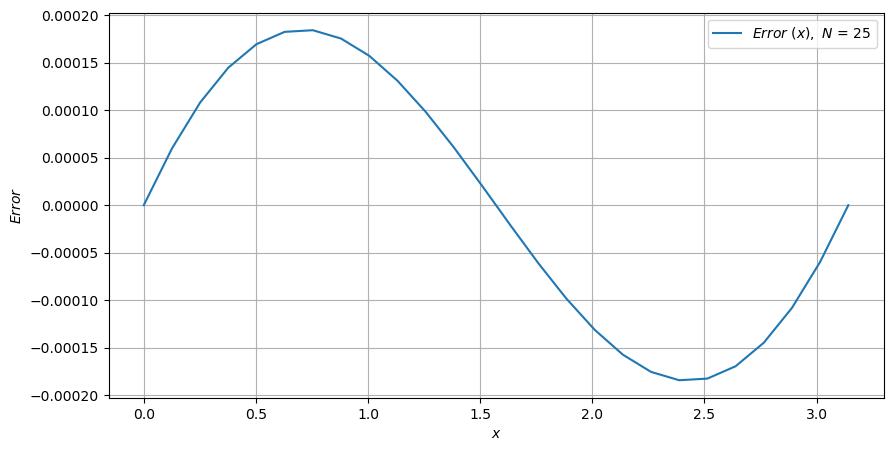

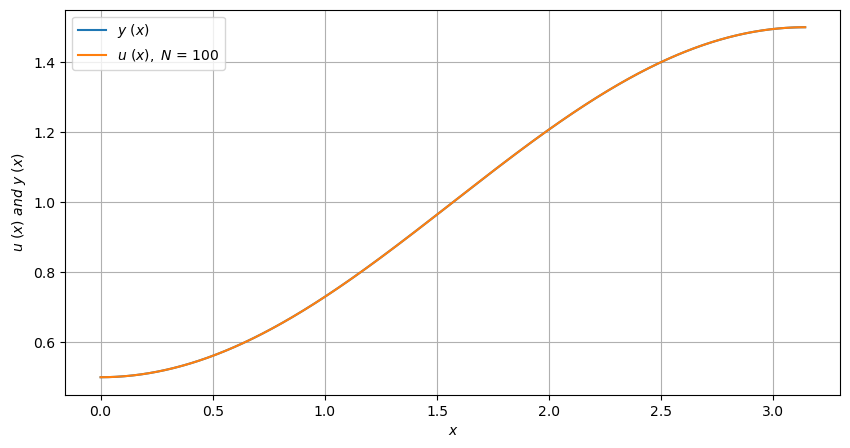

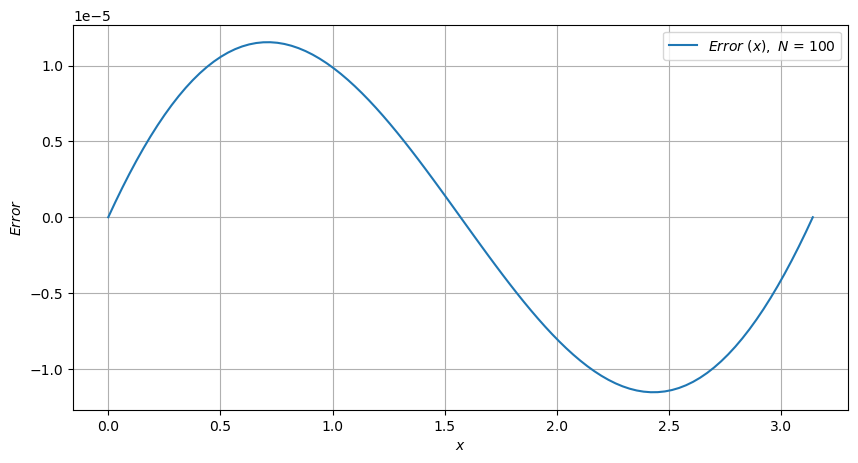

In [6]:
for N in N_:
    
    h = (xn-x0)/N
    x = np.zeros(N+1)
    x_plot = np.zeros(100*N+1)
    A = np.zeros(N+1)
    B = np.zeros(N+1)
    u = np.zeros(N+1)
    u_real = np.zeros(N+1)
    u_real_plot = np.zeros(100*N+1)
    E = np.zeros(N+1)
    
    A[0] = 0
    B[0] = 0.5
    u[N] = 1.5
    u[0] = 0.5
    u_real[0] = 0.5
    
    for i in range(0,len(x_plot)):
        
        x_plot[i] = x0 + i * h * 0.01
        u_real_plot[i] = u_(x_plot[i])
        
    for i in range(1,len(x)):
        
        x[i] = x0 + i * h
        u_real[i] = u_(x[i])
        
        A[i] = (-1) / (-2 + h**2 + A[i-1])
        B[i] = (h**2 - B[i-1]) / (-2 + h**2 + A[i-1])
        
    for i in range(len(x)-2,0,-1):

        u[i] = A[i]*u[i+1] + B[i]
        
    E = u_real - u
    E_max = abs(E).max()
    print('N =', str(N),': Max error =',str(round(E_max,5)))
    plt.figure(figsize=(10,5))
    plt.plot(x_plot,u_real_plot, label='$y$ $(x)$')
    plt.plot(x,u, label='$u$ $(x),$ $N$ = '+str(N))
    plt.xlabel('$x$')
    plt.ylabel('$u$ $(x)$ $and$ $y$ $(x)$')
    plt.legend()
    plt.grid(visible=True, which='major', axis='both')

    plt.figure(figsize=(10,5))
    plt.plot(x,E, label='$Error$ $(x),$ $N$ = '+str(N))
    plt.xlabel('$x$')
    plt.ylabel('$Error$')
    plt.legend()
    plt.grid(visible=True, which='major', axis='both')

# Задание Б

In [7]:
def f(x):
    return (1 / (1 + 25 * x**2))

def S(i,t,m):
    buf1 = ((x[t] - x_[i+1])**2) * (2 * (x[t] - x_[i]) + h) * (f_[i]) / (h**3)
    buf2 = ((x[t] - x_[i])**2) * (2 * (x_[i+1] - x[t]) + h) * (f_[i+1]) / (h**3)
    buf3 = ((x[t] - x_[i+1])**2) * (x[t] - x_[i]) * (m[i]) / (h**2)
    buf4 = ((x[t] - x_[i])**2) * (x[t] - x_[i+1]) * (m[i]) / (h**2)
    return (buf1 + buf2 + buf3 + buf4)

In [8]:
x0 = -1
xN = 1
N_ = 5, 6 ,12, 13

Global method, N =  5 : MSE =  0.02409
Global method, N =  6 : MSE =  0.00088
Global method, N =  12 : MSE =  0.00051
Global method, N =  13 : MSE =  0.0008


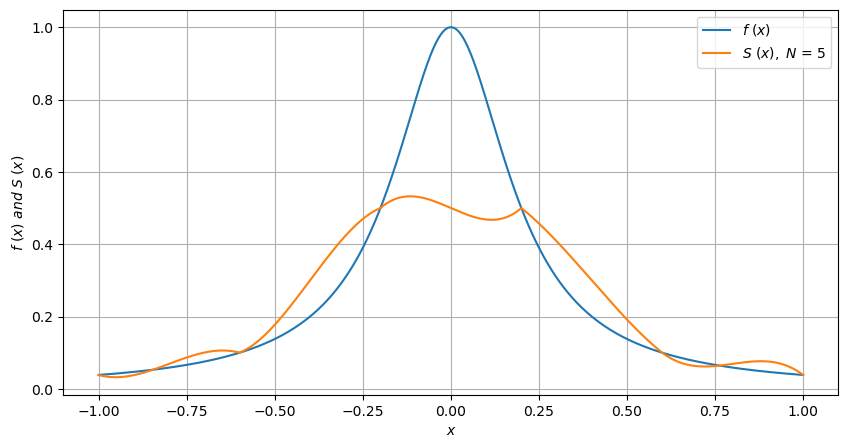

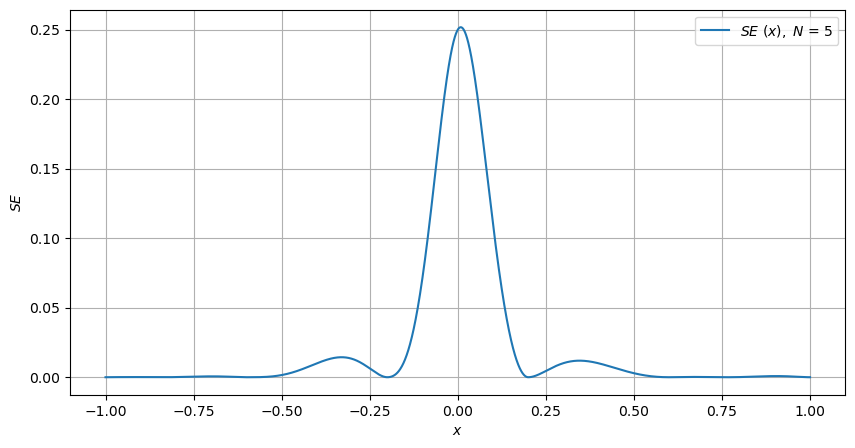

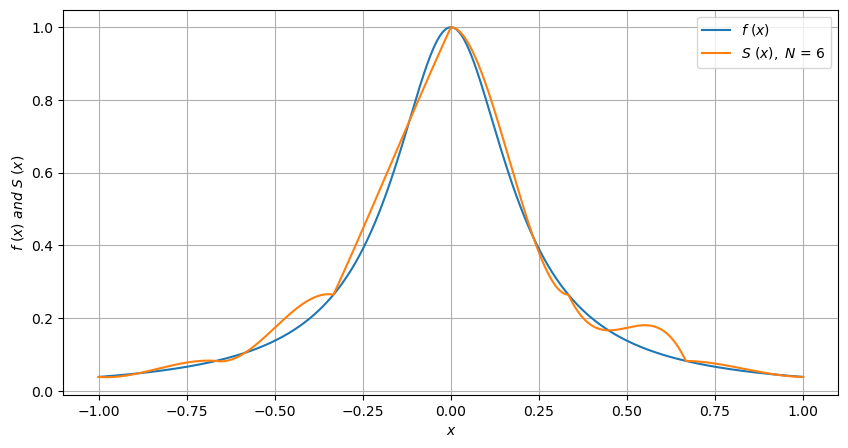

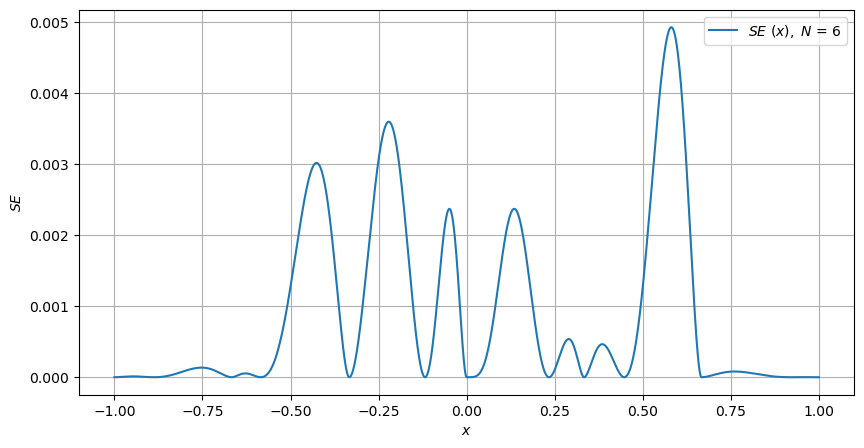

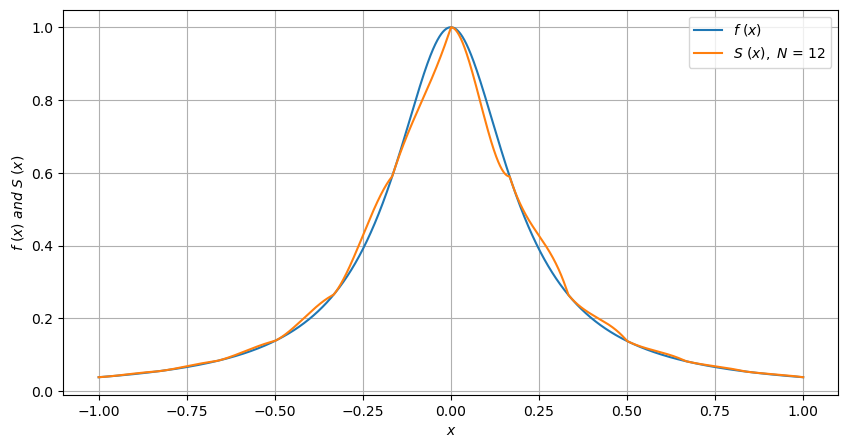

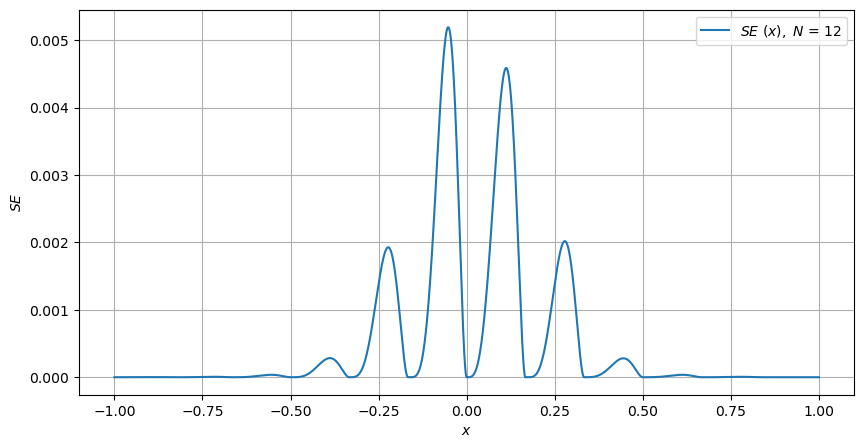

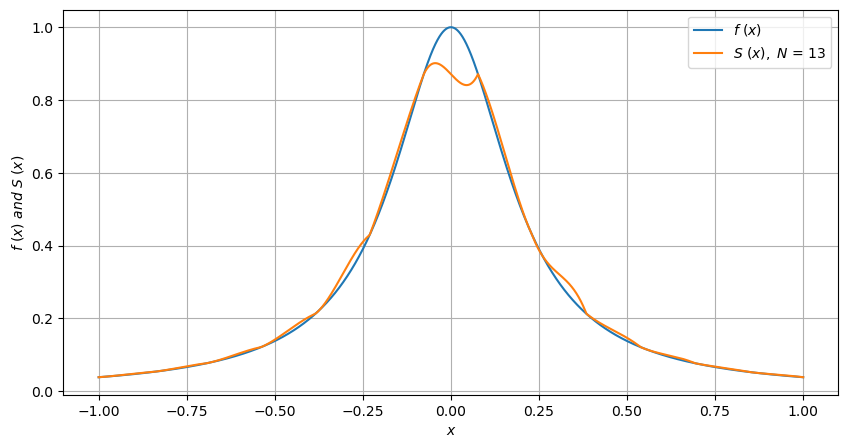

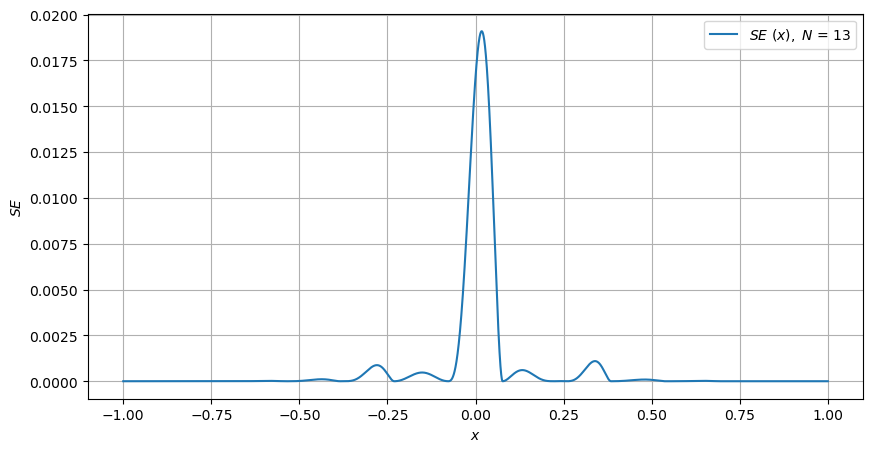

In [9]:
for N in N_:  
    h = (xN-x0)/N
    dt = h*0.001
    
    x = np.zeros(int((xN-x0)/dt)+1)
    S_ = np.zeros(int((xN-x0)/dt)+1)
    x_ = np.zeros(N+1)
    m = np.zeros(N+1)
    
    A = np.zeros(N+1)
    B = np.zeros(N+1)
    u = np.zeros(N+1)
    f_ = np.zeros(N+1)
    E = np.zeros(int((xN-x0)/dt)+1)
    
    for t in range(0,len(x)):
        
        x[t] = x0 + t * dt

    for i in range(0,N+1):
        
        x_[i] = x0 + h*i
        f_[i] = f(x_[i])
        
    m[0] = (-3*f_[0] + 4*f_[1] - f_[2])/(2*h)
    m[N] = (3*f_[N] - 4*f_[N-1] + f_[N-2])/(2*h)
    
    A[0] = -1/4
    B[0] = 3/(4*h) * (f_[2]-f_[0]) - m[0]

    for i in range (1,N):

        A[i] = (-1) / (4 + A[i-1])
        B[i] = (3 / h * (f_[i+1]-f_[i-1]) - B[i-1]) / (4+A[i-1])
        
    for i in range(len(x_)-2,0,-1):

        m[i] = A[i]*m[i+1] + B[i]
    
    for t in range(0,len(x)):
        for i in range(0,N):
            if (x[t] >= x_[i] and x[t] < x_[i+1]):
                S_[t] = S(i,t,m)
    S_[len(S_)-1] = S(N-1,len(x)-1,m)
                
    E = (f(x) - S_)**2
    
    print('Global method, N = ', str(N), ': MSE = ', str(round(abs(E.mean()),5)))
    
    plt.figure(figsize=(10,5))
    plt.plot(x,f(x), label='$f$ $(x)$')
    plt.plot(x,S_, label='$S$ $(x),$ $N$ = ' + str(N))
    plt.xlabel('$x$')
    plt.ylabel('$f$ $(x)$ $and$ $S$ $(x)$')
    plt.legend()
    plt.grid(visible=True, which='major', axis='both')

    
    plt.figure(figsize=(10,5))
    plt.plot(x, E, label='$SE$ $(x),$ $N$ = ' + str(N))
    plt.xlabel('$x$')
    plt.ylabel('$SE$')
    plt.legend()
    plt.grid(visible=True, which='major', axis='both')


# Выводы